<a href="https://colab.research.google.com/github/A-S-Adithiyaa/5thSEM/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
test = pd.read_csv("/content/drive/MyDrive/emnist-letters-test.csv")

In [3]:
print(train.shape)
print(test.shape)

(88799, 785)
(14799, 785)


In [4]:
train_data = np.array(train.iloc[:, 1:].values)
train_label = np.array(train.iloc[:, 0].values)

test_data = np.array(test.iloc[:, 1:].values)
test_label = np.array(test.iloc[:, 0].values)

In [5]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(88799, 784)
(88799,)
(14799, 784)
(14799,)


In [35]:
train_data_reshaped = train_data[1].reshape((28, 28))

In [31]:
train_data_reshaped.shape

(28, 28)

In [36]:
train_label[1]

16

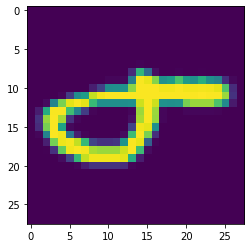

In [37]:
plt.imshow(train_data_reshaped)

In [43]:
train_images = train_data / 255
test_images = test_data / 255

In [44]:
train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [45]:
train_images.shape

(88799, 28, 28, 1)

In [46]:
test_images.shape

(14799, 28, 28, 1)

In [7]:
# train_normalized[:5, 500: 504]

array([[0.08235294, 0.00784314, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01176471, 0.        , 0.        , 0.        ],
       [0.01568627, 0.        , 0.        , 0.        ],
       [0.54117647, 0.03529412, 0.        , 0.        ]])

In [8]:
train_label[:5]

array([ 7, 16, 15, 23, 17])

In [9]:
np.unique(train_label)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [10]:
num_of_classes = 37
train_label_transformed = tf.keras.utils.to_categorical(train_label, num_of_classes)
test_label_transformed = tf.keras.utils.to_categorical(test_label, num_of_classes)

In [11]:
print(train_label_transformed[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [57]:
# model = keras.Sequential([
#                             keras.layers.Flatten(input_shape=(28,28)),
#                             keras.layers.Dense(100, activation='relu'),
#                             keras.layers.Dense(10, activation='sigmoid')
#   ])

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(num_of_classes,activation='softmax')
])

In [58]:
# model.compile(
#       optimizer='adam',
#       loss='sparse_categorical_crossentropy',
#       metrics=['accuracy']
#   )

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               2769408   
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 dense_16 (Dense)            (None, 37)                4773      
                                                      

In [62]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(train_images,train_label_transformed,test_size=0.2,random_state = 42)

In [64]:
train_images.shape

(88799, 28, 28, 1)

In [67]:
train_x.shape

(71039, 28, 28, 1)

In [72]:
model.fit(train_x,train_y,epochs=10, validation_data=(test_x, test_y))

Epoch 1/10


TypeError: ignored

In [38]:
model.fit(train_normalized, train_label, epochs=5)

Epoch 1/5
2052/2775 [=====================>........] - ETA: 1s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [28]:
yp = model.predict(test_normalized)
y_pred = [np.argmax(pred) for pred in yp]

print(classification_report(test_label, y_pred))

463/463 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     799.0
           2       0.00      0.00      0.00     800.0
           3       0.00      0.00      0.00     800.0
           4       0.00      0.00      0.00     800.0
           5       0.00      0.00      0.00     800.0
           6       0.00      0.00      0.00     800.0
           7       0.00      0.00      0.00     800.0
           8       0.00      0.00      0.00     800.0
           9       0.00      0.00      0.00     800.0
          10       0.00      0.00      0.00     800.0
          11       0.00      0.00      0.00     800.0
          12       0.00      0.00      0.00     800.0
          13       0.00      0.00      0.00     800.0
          14       0.00      0.00      0.00     800.0
          15       0.00      0.00      0.00     800.0
          16       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1